In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('health care diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Week 1
# 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [9]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [10]:
df[df["Pregnancies"]==17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [11]:
df[df["Pregnancies"]==15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1


In [12]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

* Here in coulmn Pregnancies we can see that minimum value is 0 and maximum value is 17.
* Pregnancy value of 17 is a bit high but not impossible and the Age is 47 so we will not treat this as an outlier.
* It is a numeric categorical column with DataType int64.
* Value in this column lies between 0 and 17.

In [13]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

* Glucose is a Numeric column with Minimum value of 0 and Maximum value of 199.
* But value of 0 (zero) does not make sense and thus we will treat it as missing value.
* Also Maximum value of 199 can be an outlier. So, we will check this by Z score method to check if this is an outlier or not.
* We will also see if there are other outlier in this column or not.

In [14]:
# Check for Outliers
df[df['Glucose']>df['Glucose'].mean()+3*df['Glucose'].std()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [15]:
# Check how many 0 in this column
count = (df['Glucose'] == 0).sum()
count

5

* As we can see, there are no outliers in this column.
* Also, there are 5 rows where value of Glucose is 0 i.e, missing value. Hence, Missing value in df['Glucose'] is 5.

In [16]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [17]:
# Check for Outliers
df[df['BloodPressure']>df['BloodPressure'].mean()+3*df['BloodPressure'].std()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [18]:
# Check how many 0 in this column
count = (df['BloodPressure'] == 0).sum()
count

35

* BloodPressure is a Numeric column with Minimum value of 0 and Maximum value of 122.
* As checked it has no Outliers.
* Also, In this column there are 35 entries as 0 (zero) i.e, 35 missing values.

In [19]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [20]:
count = (df['SkinThickness'] == 0).sum()
count

227

In [21]:
# Check for Outliers
df[df['SkinThickness']>df['SkinThickness'].mean()+3*df['SkinThickness'].std()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


* Here in this column there are 227 entries as 0 (zero) meaning 227 missing values. That is a lot.
* Also as checked there is one outlier. We will drop this Row by simply creating a new DataFrame 'df1' with all the elements       excluding the outlier.

In [22]:
df.shape

(768, 9)

In [23]:
df1 = df[df['SkinThickness']<df['SkinThickness'].mean()+3*df['SkinThickness'].std()]

In [24]:
df1.shape

(767, 9)

In [25]:
# Check if the outlier is gone in our new DataFrame 'df1'
df1[df1['SkinThickness']>df1['SkinThickness'].mean()+3*df1['SkinThickness'].std()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


* This column is a Numeric Column.
* It contains one Outlier which we have dealt with in our new DataFrame 'df1'.
* Also, this column contains 227 etries as 0 (zero) i.e., 227 missing values.

In [26]:
df1['Insulin'].describe()

count    767.000000
mean      79.903520
std      115.283105
min        0.000000
25%        0.000000
50%       32.000000
75%      127.500000
max      846.000000
Name: Insulin, dtype: float64

* Insulin is a Numeric Column with Minimum value as 0 and Maximum value as 846. As 846 is too high, it is clearly an outlier.
* Also all the 0 entries indicate missing values.

In [27]:
# Check for Outliers
df1[df1['Insulin']>df1['Insulin'].mean()+3*df1['Insulin'].std()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
370,3,173,82,48,465,38.4,2.137,25,1


There are so many outliers let remove them.

In [28]:
df1.shape

(767, 9)

In [29]:
df2 = df1[df1['Insulin']<df1['Insulin'].mean()+3*df1['Insulin'].std()]

In [30]:
df2.shape

(749, 9)

In [31]:
767-749

18

* There were 18 outliers in this DataFrame which have been dropped.

In [32]:
count = (df2['Insulin'] == 0).sum()
count

373

In [33]:
df2['Insulin'].value_counts()

0      373
105     11
130      9
140      9
120      8
      ... 
249      1
270      1
43       1
108      1
112      1
Name: Insulin, Length: 170, dtype: int64

* In this column there are 373 entries as 0 (zero) means all 373 are missing values.

In [34]:
df2['BMI'].describe()

count    749.000000
mean      31.869559
std        7.893354
min        0.000000
25%       27.100000
50%       32.000000
75%       36.400000
max       67.100000
Name: BMI, dtype: float64

* Here BMI value lies between 0 and 67. As BMI value can not be 0 means they are missing values.
* It is a Numeric Column.

In [35]:
count = (df2['BMI'] == 0).sum()
count

11

* There are 11 entries as 0 (zero) in this column meaning 11 missing values.

In [36]:
# Check for Outliers
df2[df2['BMI']>df2['BMI'].mean()+3*df2['BMI'].std()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


* There are 3 outliers in this column. Lets Drop them and save it in new datafame 'df3'.

In [37]:
df3 = df2[df2['BMI']<df2['BMI'].mean()+3*df2['BMI'].std()]

In [38]:
df2.shape

(749, 9)

In [39]:
df3.shape

(746, 9)

* Therefore the 3 Outliers has been dropped.

In [40]:
df3['DiabetesPedigreeFunction'].describe()

count    746.000000
mean       0.464229
std        0.312775
min        0.078000
25%        0.243250
50%        0.368000
75%        0.613750
max        2.288000
Name: DiabetesPedigreeFunction, dtype: float64

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               746 non-null    int64  
 1   Glucose                   746 non-null    int64  
 2   BloodPressure             746 non-null    int64  
 3   SkinThickness             746 non-null    int64  
 4   Insulin                   746 non-null    int64  
 5   BMI                       746 non-null    float64
 6   DiabetesPedigreeFunction  746 non-null    float64
 7   Age                       746 non-null    int64  
 8   Outcome                   746 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.3 KB


* DiabetesPedigreeFunction is a Numeric Column with minimum value 0.078000 and maximum value 2.288000.
* There are no missing values in this column.

In [42]:
df3['Outcome'].describe()     

count    746.000000
mean       0.339142
std        0.473736
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [43]:
df3['Outcome'].value_counts()

0    493
1    253
Name: Outcome, dtype: int64

* Outcome is our Target column. It contains 0 and 1.
* 0 means Non-Diabetic and 1 means Diabetic.
* There are no missing values.

# 2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [44]:
df3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

(i) Pregnancies

(array([106., 131.,  99.,  72.,  67.,  56.,  50.,  44.,  35.,  28.,  24.,
         11.,   9.,  10.,   2.,   1.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17.]),
 <BarContainer object of 17 artists>)

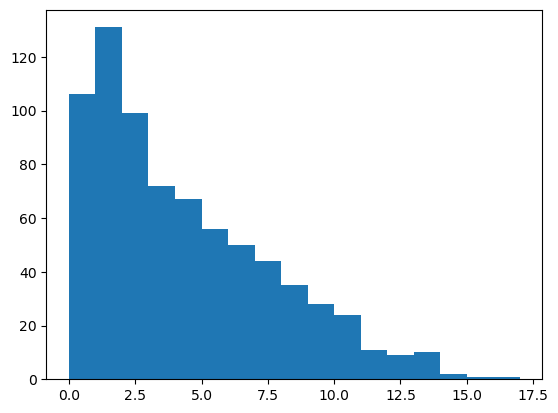

In [45]:
plt.hist(x=df3['Pregnancies'], bins=17)

* Here we can see that 50% of our observations has Pregnancies 3 or lower.
* We have a range of 0 to 17 in this column.
* This column does not consist any missing values.

(ii) Glucose

(array([  5.,   0.,   0.,   0.,   1.,   3.,   7.,  25.,  63.,  93., 117.,
         94.,  99.,  60.,  53.,  36.,  30.,  21.,  24.,  15.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <BarContainer object of 20 artists>)

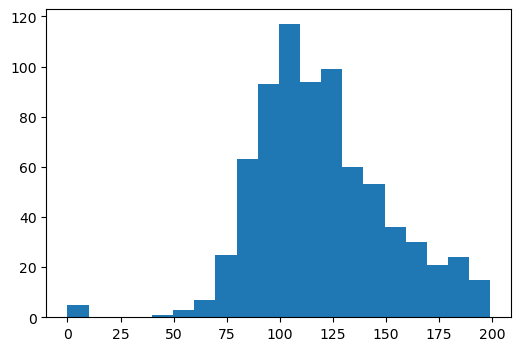

In [46]:
plt.figure(figsize=(6,4))

plt.hist(df3['Glucose'],bins=20)

In [47]:
df3['Glucose'].mean()

119.61528150134048

In [48]:
count = (df3['Glucose'] == 0).sum()
count

5

* There are 5 missing values in our dataset. Lets simply fill the null values with mean in this column.

In [49]:
df3['Glucose'].replace(0, df3['Glucose'].mean(), inplace=True)

In [50]:
count = (df3['Glucose'] == 0).sum()
count

0

* Glucose column seems normally dristributed.
* We have filled the missing values with mean of this column.

(iii) BloodPressure

(array([ 35.,   0.,   0.,   1.,   2.,   0.,   2.,  11.,  34.,  70., 113.,
        141., 141.,  95.,  65.,  19.,   6.,   7.,   3.,   1.]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

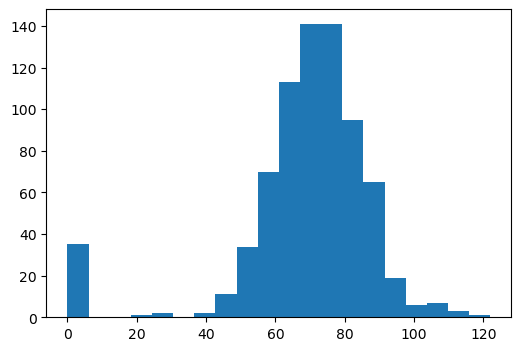

In [51]:
plt.figure(figsize=(6,4))

plt.hist(df3['BloodPressure'],bins=20)

In [52]:
count = (df3['BloodPressure'] == 0).sum()
count

35

In [53]:
df3['BloodPressure'].mean()

68.89142091152814

* BloodPressure Coulmn is clearly normally dristributed.
* It has 35 missing values. We can simply fill all the 0 with the mean of this column. 

In [54]:
df3['BloodPressure'].replace(0, df3['BloodPressure'].mean(), inplace=True)

In [55]:
count = (df3['BloodPressure'] == 0).sum()
count

0

(array([  1.,   2.,   1.,   1.,  11.,  23.,  46.,  68., 123., 133.,  97.,
        112.,  48.,  52.,  11.,   6.,   5.,   4.,   1.,   1.]),
 array([ 24. ,  28.9,  33.8,  38.7,  43.6,  48.5,  53.4,  58.3,  63.2,
         68.1,  73. ,  77.9,  82.8,  87.7,  92.6,  97.5, 102.4, 107.3,
        112.2, 117.1, 122. ]),
 <BarContainer object of 20 artists>)

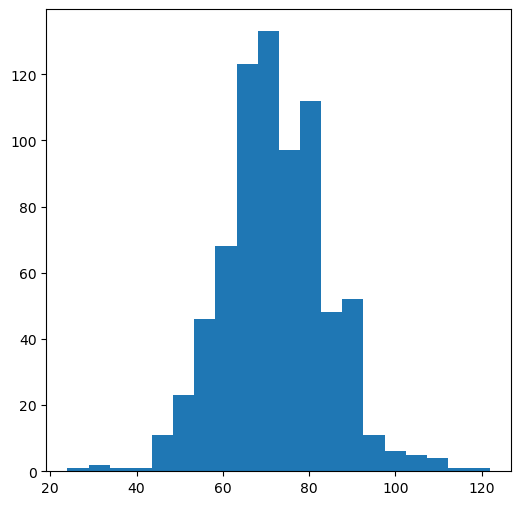

In [56]:
plt.figure(figsize=(6,6))

plt.hist(df3['BloodPressure'],bins=20)

(iv) SkinThickness 

(array([227.,   0.,   4.,  11.,  24.,  34.,  51.,  47.,  41.,  58.,  77.,
         39.,  36.,  47.,  19.,  16.,   8.,   3.,   3.,   1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
        39., 42., 45., 48., 51., 54., 57., 60.]),
 <BarContainer object of 20 artists>)

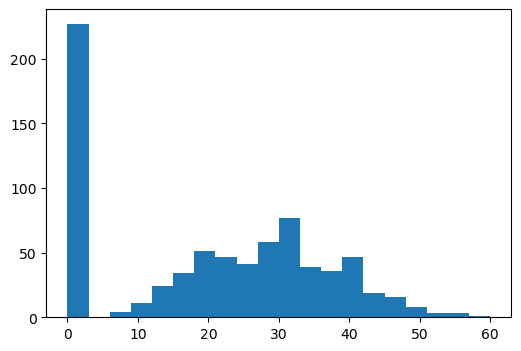

In [57]:
plt.figure(figsize=(6,4))

plt.hist(df3['SkinThickness'],bins=20)

In [58]:
count = (df3['SkinThickness'] == 0).sum()
count

227

In [59]:
df3['SkinThickness'].mean()

19.955764075067023

In [60]:
df3['SkinThickness'].median()

22.0

In [61]:
df3['SkinThickness'].mode()[0]

0

In [62]:
df3['SkinThickness'].replace(0, np.nan, inplace=True)

In [63]:
df3['SkinThickness'].mean()

28.684007707129094

In [64]:
df3['SkinThickness'].median()

29.0

In [65]:
df3['SkinThickness'].mode()[0]

32.0

(array([ 4., 18., 17., 34., 51., 26., 47., 57., 43., 68., 34., 23., 47.,
        19., 12.,  9.,  6.,  2.,  1.,  1.]),
 array([ 7.  ,  9.65, 12.3 , 14.95, 17.6 , 20.25, 22.9 , 25.55, 28.2 ,
        30.85, 33.5 , 36.15, 38.8 , 41.45, 44.1 , 46.75, 49.4 , 52.05,
        54.7 , 57.35, 60.  ]),
 <BarContainer object of 20 artists>)

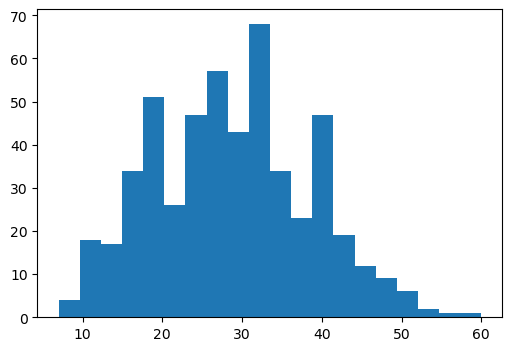

In [66]:
plt.figure(figsize=(6,4))

plt.hist(df3['SkinThickness'],bins=20)

In [67]:
df4 = df3.dropna()

In [68]:
df3.shape

(746, 9)

(array([ 4., 18., 17., 34., 51., 26., 47., 57., 43., 68., 34., 23., 47.,
        19., 12.,  9.,  6.,  2.,  1.,  1.]),
 array([ 7.  ,  9.65, 12.3 , 14.95, 17.6 , 20.25, 22.9 , 25.55, 28.2 ,
        30.85, 33.5 , 36.15, 38.8 , 41.45, 44.1 , 46.75, 49.4 , 52.05,
        54.7 , 57.35, 60.  ]),
 <BarContainer object of 20 artists>)

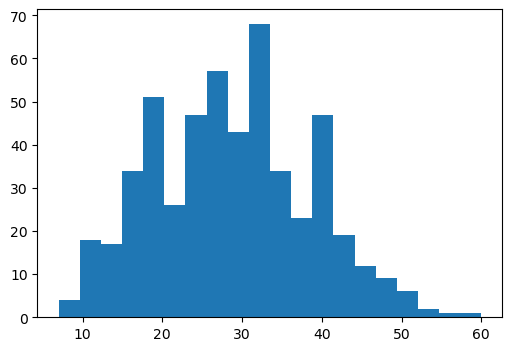

In [69]:
plt.figure(figsize=(6,4))

plt.hist(df4['SkinThickness'],bins=20)

In [70]:
df4.shape

(519, 9)

In [71]:
746-519

227

(iv) Insulin

(array([150.,  15.,  43.,  46.,  42.,  43.,  41.,  25.,  31.,  22.,  13.,
          8.,   6.,  11.,   6.,   8.,   2.,   2.,   3.,   2.]),
 array([  0.  ,  20.75,  41.5 ,  62.25,  83.  , 103.75, 124.5 , 145.25,
        166.  , 186.75, 207.5 , 228.25, 249.  , 269.75, 290.5 , 311.25,
        332.  , 352.75, 373.5 , 394.25, 415.  ]),
 <BarContainer object of 20 artists>)

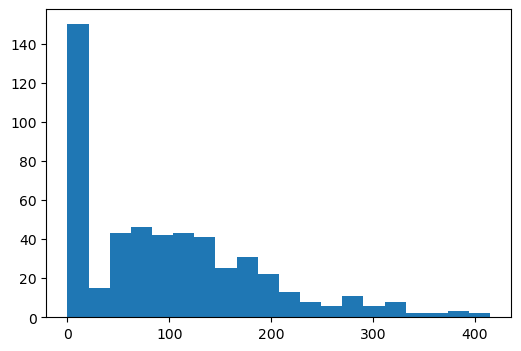

In [72]:
plt.figure(figsize=(6,4))

plt.hist(df4['Insulin'],bins=20)

In [73]:
df4['Insulin'].replace(0, np.nan, inplace=True)

In [74]:
df4['Insulin'].mean()

136.79088471849866

In [75]:
df4['Insulin'].median()

120.0

In [76]:
df4['Insulin'].mode()[0]

105.0

In [77]:
df4['Insulin'].value_counts()

105.0    11
140.0     9
120.0     8
130.0     8
94.0      7
         ..
270.0     1
43.0      1
108.0     1
73.0      1
112.0     1
Name: Insulin, Length: 168, dtype: int64

In [78]:
df4.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     146
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

(array([10., 37., 43., 47., 37., 39., 28., 28., 33., 15., 12.,  6.,  8.,
        10.,  3.,  8.,  2.,  2.,  3.,  2.]),
 array([ 15.,  35.,  55.,  75.,  95., 115., 135., 155., 175., 195., 215.,
        235., 255., 275., 295., 315., 335., 355., 375., 395., 415.]),
 <BarContainer object of 20 artists>)

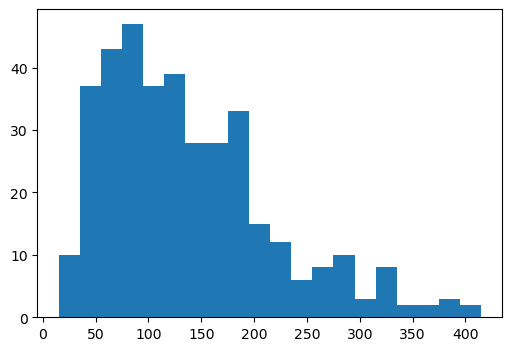

In [79]:
plt.figure(figsize=(6,4))

plt.hist(df4['Insulin'],bins=20)

In [80]:
df5 = df4.dropna()

(array([10., 37., 43., 47., 37., 39., 28., 28., 33., 15., 12.,  6.,  8.,
        10.,  3.,  8.,  2.,  2.,  3.,  2.]),
 array([ 15.,  35.,  55.,  75.,  95., 115., 135., 155., 175., 195., 215.,
        235., 255., 275., 295., 315., 335., 355., 375., 395., 415.]),
 <BarContainer object of 20 artists>)

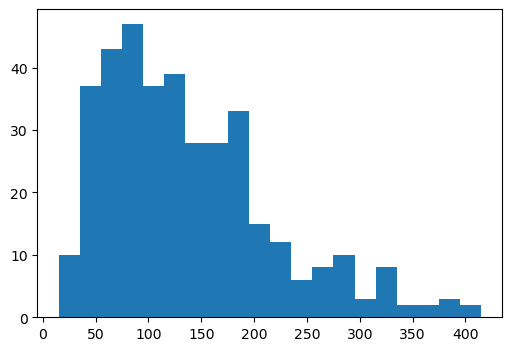

In [81]:
plt.figure(figsize=(6,4))

plt.hist(df5['Insulin'],bins=20)

In [82]:
df4.shape

(519, 9)

In [83]:
df5.shape

(373, 9)

(v) BMI

df5['BMI'].value_counts()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1., 16., 26., 40., 53., 51., 71.,
        50., 25., 19., 15.,  2.,  1.,  2.]),
 array([ 0.  ,  2.75,  5.5 ,  8.25, 11.  , 13.75, 16.5 , 19.25, 22.  ,
        24.75, 27.5 , 30.25, 33.  , 35.75, 38.5 , 41.25, 44.  , 46.75,
        49.5 , 52.25, 55.  ]),
 <BarContainer object of 20 artists>)

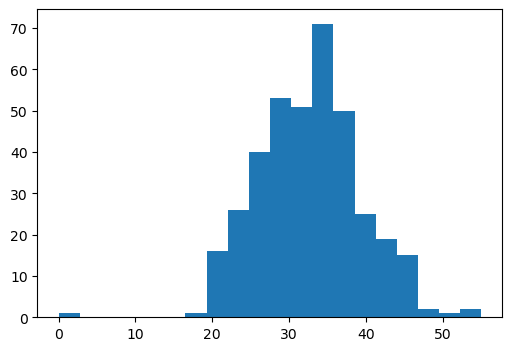

In [84]:
plt.figure(figsize=(6,4))

plt.hist(df5['BMI'],bins=20)

In [85]:
df5['BMI'].mean()

32.56943699731902

In [86]:
df5['BMI'].median()

32.9

In [87]:
df5['BMI'].mode()

0    32.0
1    33.3
Name: BMI, dtype: float64

In [88]:
df5['BMI'].replace(0, np.nan, inplace=True)

In [89]:
df5.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
df5['BMI'] = df5['BMI'].fillna(df5['BMI'].mean())

(array([ 7., 10., 11., 32., 22., 33., 39., 34., 52., 36., 33., 18., 13.,
        13.,  8.,  8.,  1.,  1.,  0.,  2.]),
 array([18.2 , 20.04, 21.88, 23.72, 25.56, 27.4 , 29.24, 31.08, 32.92,
        34.76, 36.6 , 38.44, 40.28, 42.12, 43.96, 45.8 , 47.64, 49.48,
        51.32, 53.16, 55.  ]),
 <BarContainer object of 20 artists>)

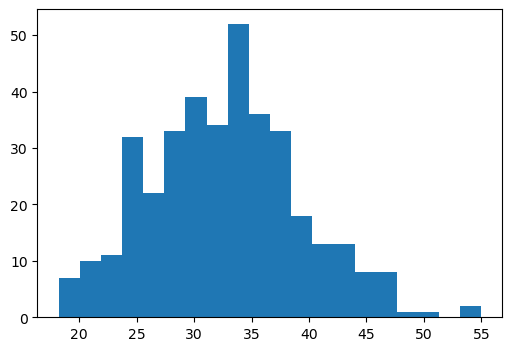

In [91]:
plt.figure(figsize=(6,4))

plt.hist(df5['BMI'],bins=20)

(vi) DiabetesPedigreeFunction

In [92]:
df5['DiabetesPedigreeFunction'].value_counts()

0.299    4
0.692    4
0.452    3
0.422    3
0.260    3
        ..
0.731    1
0.123    1
0.127    1
0.122    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 314, dtype: int64

(array([40., 75., 57., 53., 38., 41., 21., 17.,  9.,  6.,  6.,  6.,  0.,
         1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([0.085  , 0.19515, 0.3053 , 0.41545, 0.5256 , 0.63575, 0.7459 ,
        0.85605, 0.9662 , 1.07635, 1.1865 , 1.29665, 1.4068 , 1.51695,
        1.6271 , 1.73725, 1.8474 , 1.95755, 2.0677 , 2.17785, 2.288  ]),
 <BarContainer object of 20 artists>)

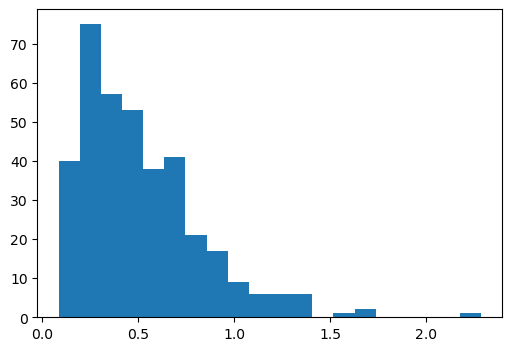

In [93]:
plt.figure(figsize=(6,4))

plt.hist(df5['DiabetesPedigreeFunction'],bins=20)

In [94]:
df5['DiabetesPedigreeFunction'].replace(0, np.nan, inplace=True)

In [95]:
df5.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

(vii) Age

In [96]:
df5['Age'].value_counts()

22    41
21    33
24    31
25    27
23    26
26    22
28    20
29    14
27    14
31    11
33    11
30     9
37     8
43     8
39     7
36     7
34     7
42     7
51     6
35     6
40     6
32     6
46     5
41     5
58     4
45     4
48     3
38     3
47     3
55     2
57     2
49     2
54     2
53     2
50     2
61     1
44     1
56     1
81     1
60     1
52     1
63     1
Name: Age, dtype: int64

(array([100.,  80.,  48.,  26.,  24.,  18.,  18.,  16.,  12.,   7.,   9.,
          5.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([21., 24., 27., 30., 33., 36., 39., 42., 45., 48., 51., 54., 57.,
        60., 63., 66., 69., 72., 75., 78., 81.]),
 <BarContainer object of 20 artists>)

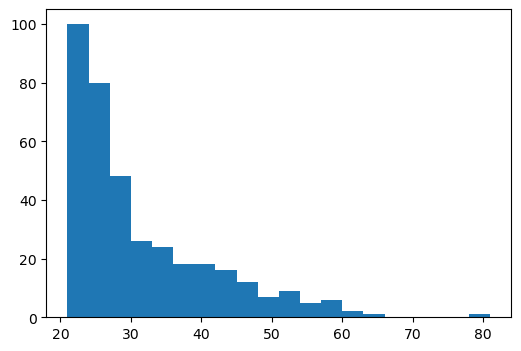

In [97]:
plt.figure(figsize=(6,4))

plt.hist(df5['Age'],bins=20)

(viii) Outcome

In [98]:
df5['Outcome'].value_counts()

0    257
1    116
Name: Outcome, dtype: int64

In [99]:
116/257

0.45136186770428016

(array([257., 116.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

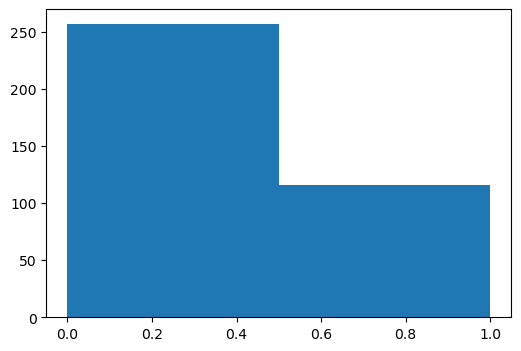

In [100]:
plt.figure(figsize=(6,4))

plt.hist(df5['Outcome'],bins=2)

# 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [101]:
df5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1


In [102]:
df5.shape

(373, 9)

In [103]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               373 non-null    int64  
 1   Glucose                   373 non-null    float64
 2   BloodPressure             373 non-null    float64
 3   SkinThickness             373 non-null    float64
 4   Insulin                   373 non-null    float64
 5   BMI                       373 non-null    float64
 6   DiabetesPedigreeFunction  373 non-null    float64
 7   Age                       373 non-null    int64  
 8   Outcome                   373 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 29.1 KB


(i) Pregnancies

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

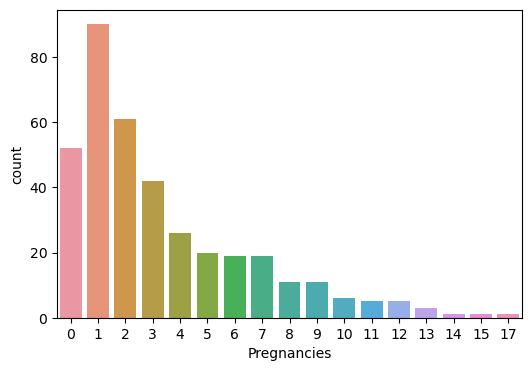

In [104]:
plt.figure(figsize=(6,4))

sns.countplot(df5['Pregnancies'])

(ii) Glucose                   

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

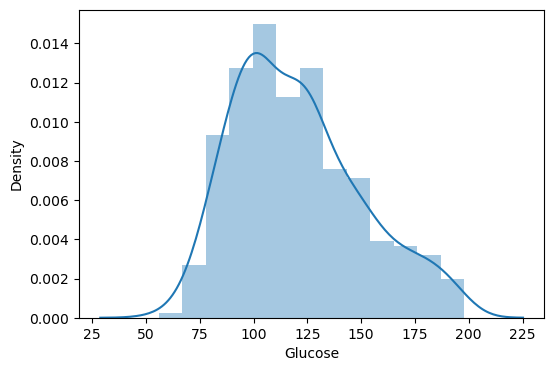

In [105]:
plt.figure(figsize=(6,4))

sns.distplot(df5['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

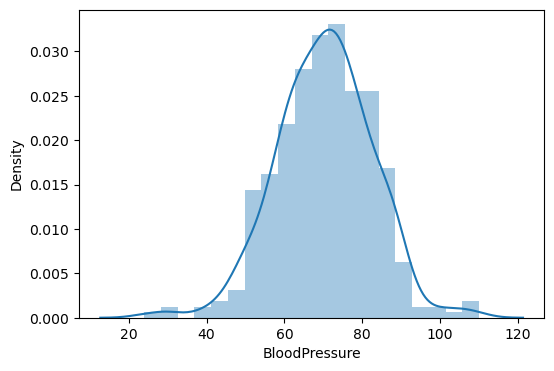

In [106]:
plt.figure(figsize=(6,4))

sns.distplot(df5['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

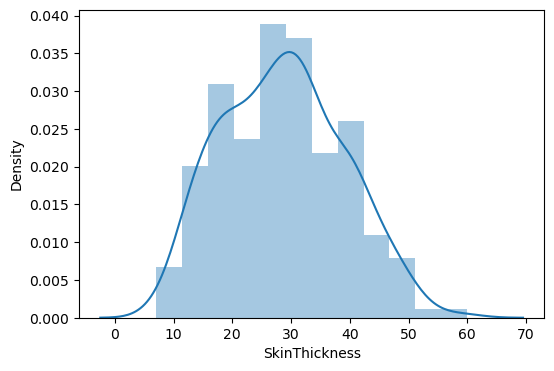

In [107]:
plt.figure(figsize=(6,4))

sns.distplot(df5['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

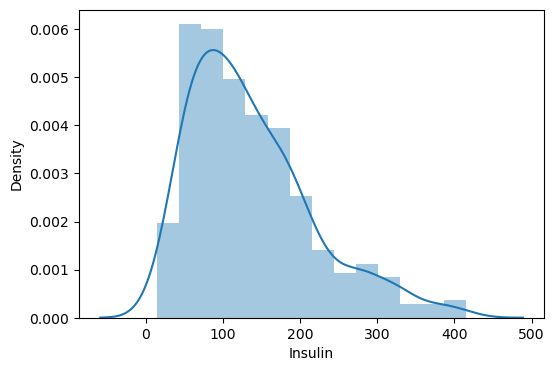

In [108]:
plt.figure(figsize=(6,4))

sns.distplot(df5['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

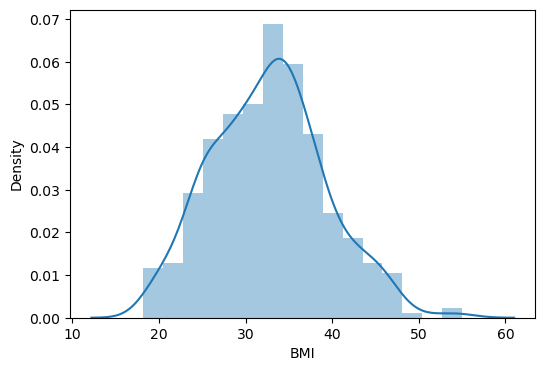

In [109]:
plt.figure(figsize=(6,4))

sns.distplot(df5['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

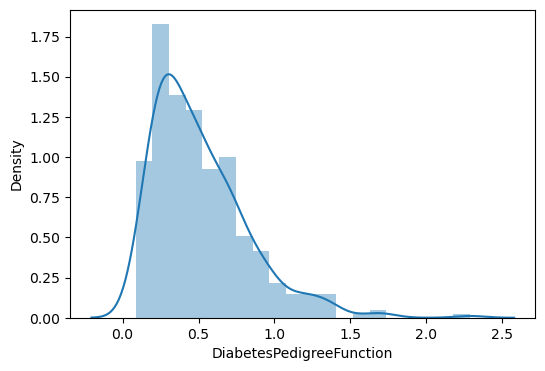

In [110]:
plt.figure(figsize=(6,4))

sns.distplot(df5['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

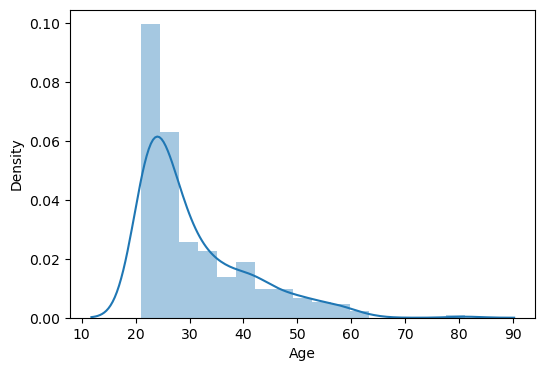

In [111]:
plt.figure(figsize=(6,4))

sns.distplot(df5['Age'])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

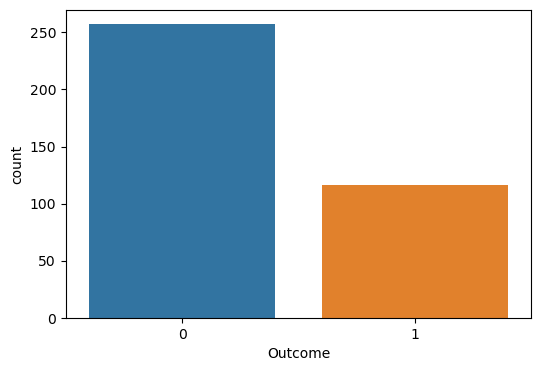

In [112]:
plt.figure(figsize=(6,4))

sns.countplot(df5['Outcome'])

# Week 2

# 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

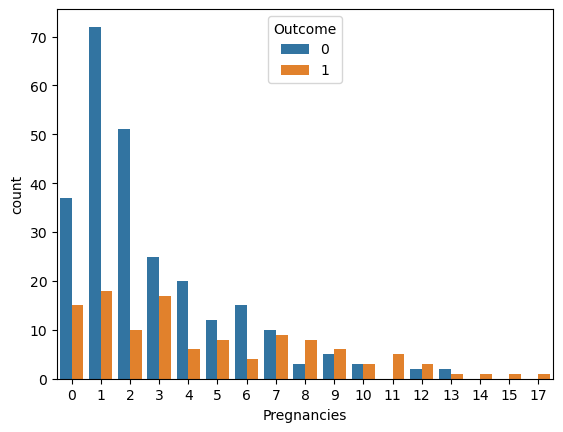

In [113]:
sns.countplot(data= df5, x= "Pregnancies", hue= "Outcome")

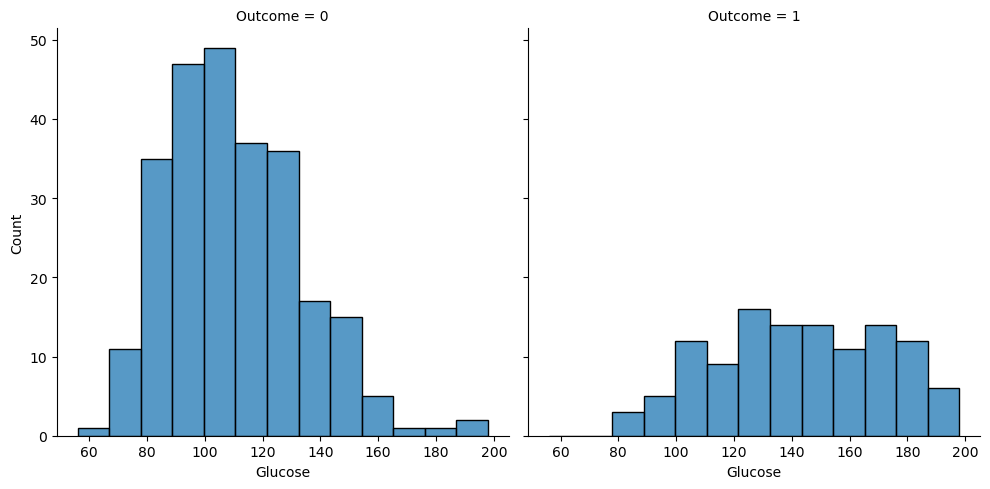

In [114]:
sns.displot(data= df5, x= "Glucose", col= "Outcome")

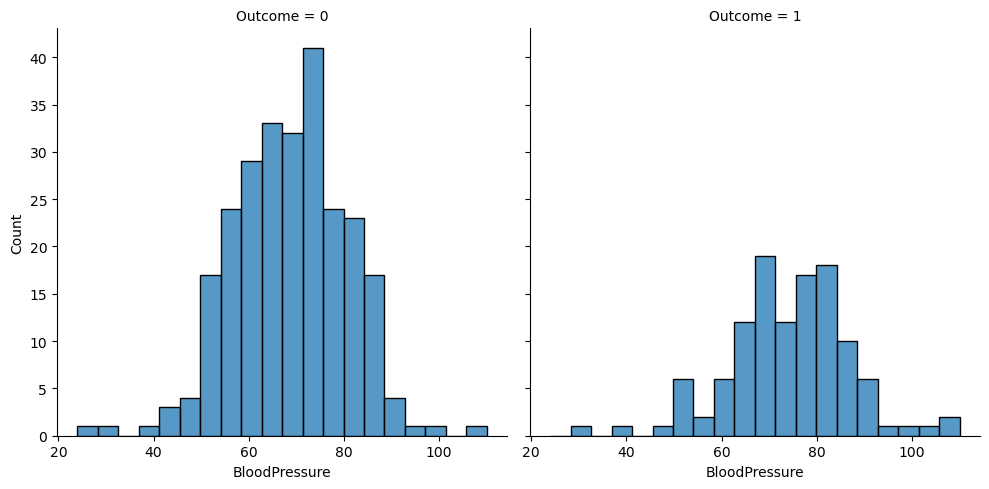

In [115]:
sns.displot(data= df5, x= "BloodPressure", col= "Outcome")

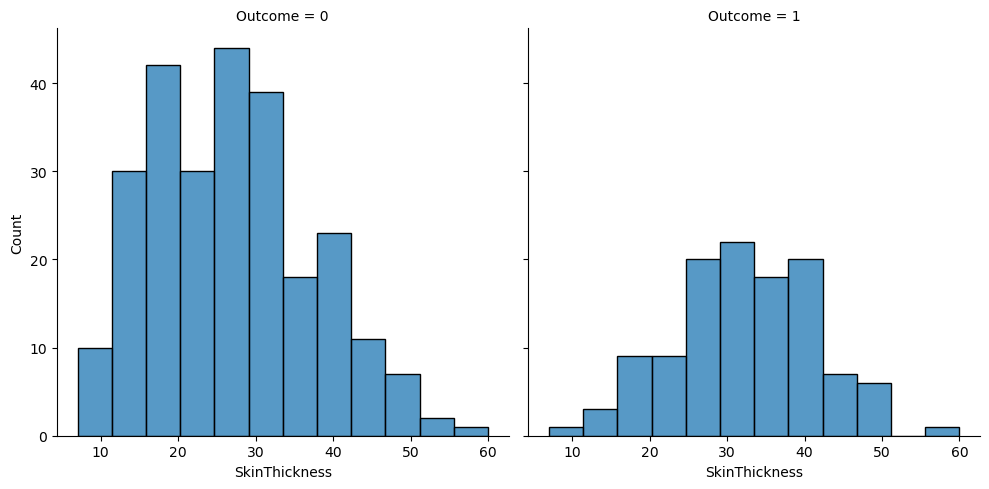

In [116]:
sns.displot(data= df5, x= "SkinThickness", col= "Outcome")

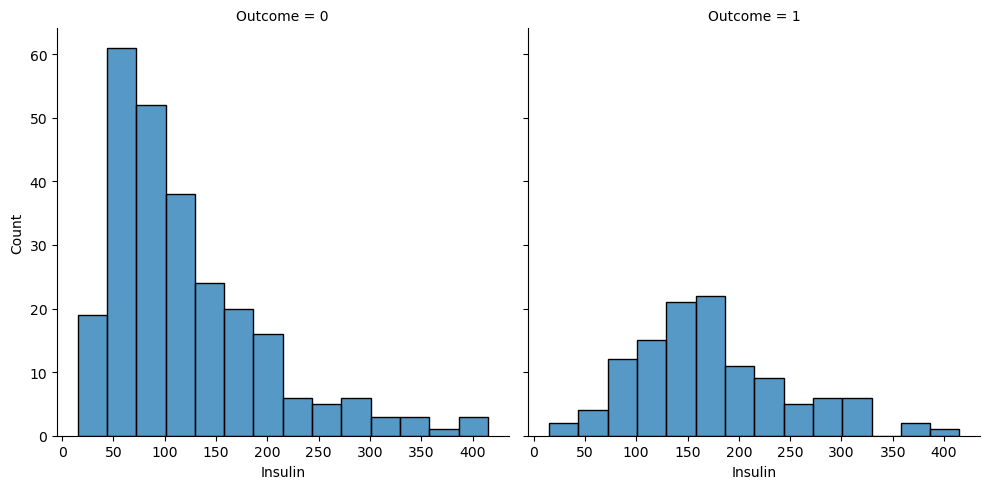

In [117]:
sns.displot(data= df5, x= "Insulin", col= "Outcome")

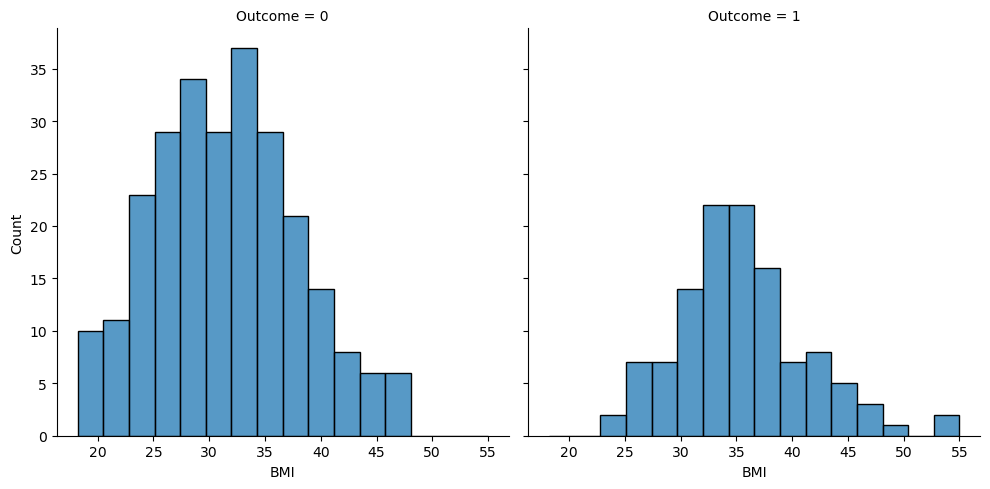

In [118]:
sns.displot(data= df5, x= "BMI", col= "Outcome")

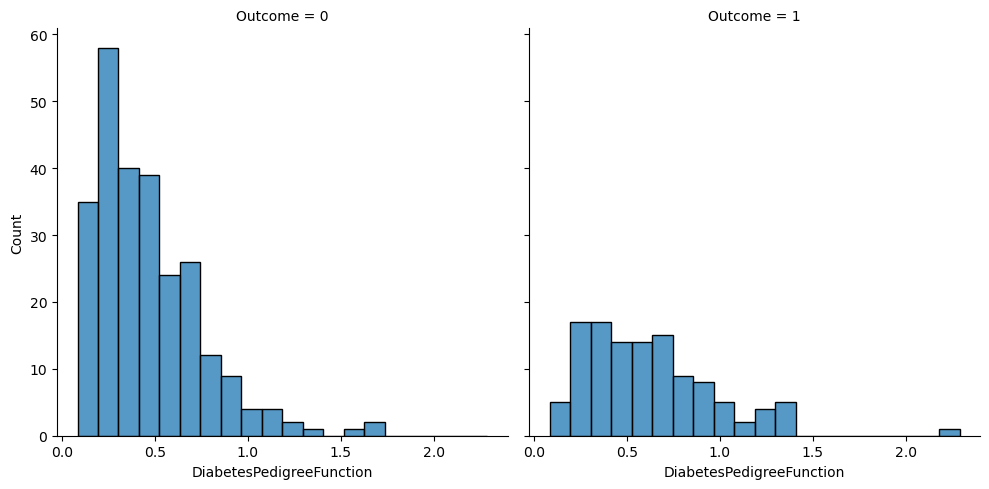

In [119]:
sns.displot(data= df5, x= "DiabetesPedigreeFunction", col= "Outcome")

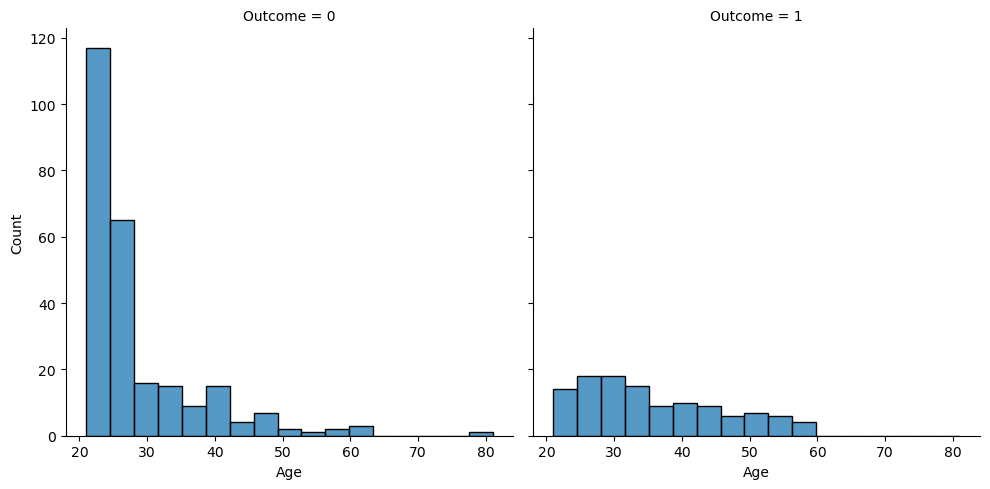

In [120]:
sns.displot(data= df5, x= "Age", col= "Outcome")

# 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

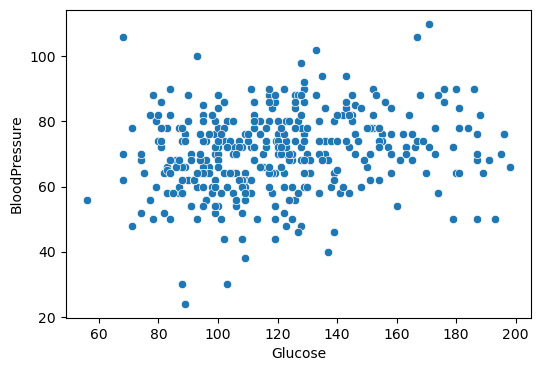

In [121]:
plt.figure(figsize= (6,4))

sns.scatterplot(data=df5, x= "Glucose", y= "BloodPressure")

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

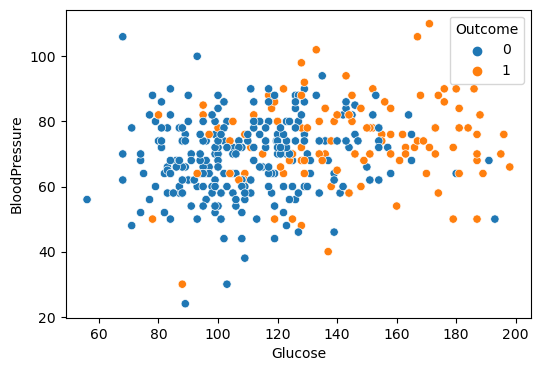

In [122]:
plt.figure(figsize= (6,4))

sns.scatterplot(data=df5, x= "Glucose", y= "BloodPressure",hue="Outcome")

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

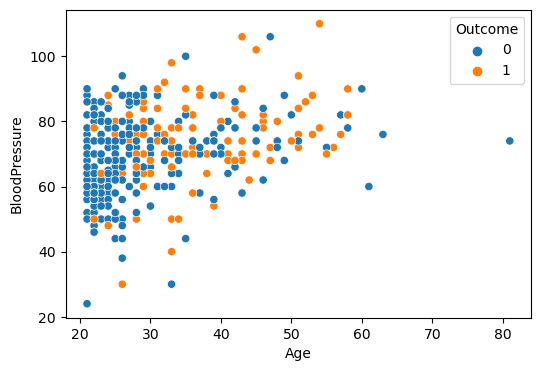

In [123]:
plt.figure(figsize= (6,4))

sns.scatterplot(data=df5, x= "Age", y= "BloodPressure",hue="Outcome")

<AxesSubplot:xlabel='Age', ylabel='SkinThickness'>

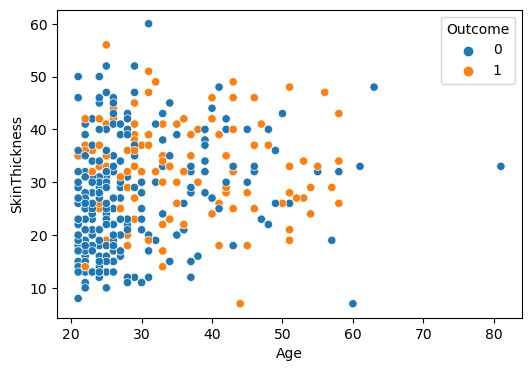

In [124]:
plt.figure(figsize= (6,4))

sns.scatterplot(data=df5, x= "Age", y= "SkinThickness",hue="Outcome")

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

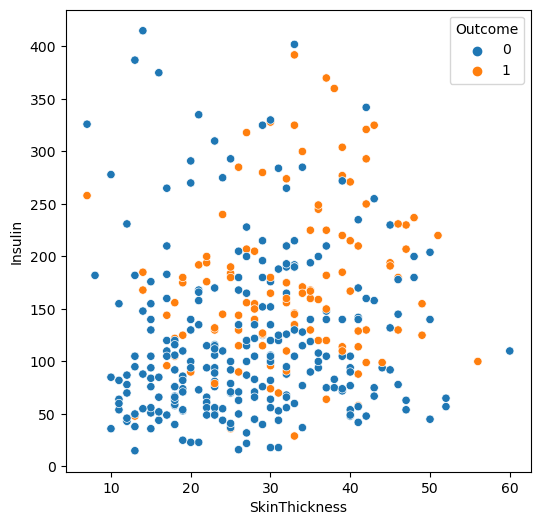

In [125]:
plt.figure(figsize= (6,6))

sns.scatterplot(data=df5, x= "SkinThickness", y= "Insulin",hue="Outcome")

<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

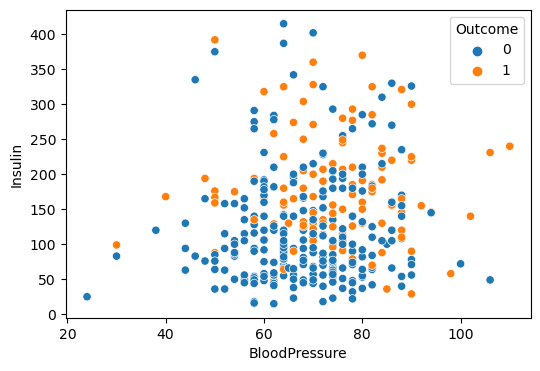

In [126]:
plt.figure(figsize= (6,4))

sns.scatterplot(data=df5, x= "BloodPressure", y= "Insulin",hue="Outcome")

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

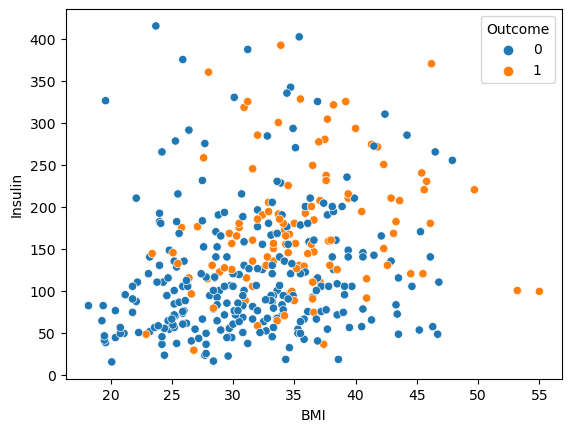

In [127]:
sns.scatterplot(data=df5,x= "BMI" ,y= "Insulin",hue="Outcome")

# 3. Perform correlation analysis. Visually explore it using a heat map.

In [128]:
corr = df5.corr()

In [129]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.236243,0.237575,0.130334,0.144048,0.024498,0.011486,0.691797,0.275698
Glucose,0.236243,1.000000,0.214570,0.147153,0.572444,0.176238,0.084547,0.354969,0.506141
BloodPressure,0.237575,0.214570,1.000000,0.212400,0.103924,0.252921,-0.037887,0.345300,0.200740
SkinThickness,0.130334,0.147153,0.212400,1.000000,0.159890,0.664010,0.092993,0.202478,0.250238
Insulin,0.144048,0.572444,0.103924,0.159890,1.000000,0.239944,0.115315,0.230265,0.315527
BMI,0.024498,0.176238,0.252921,0.664010,0.239944,1.000000,0.112701,0.135779,0.282915
DiabetesPedigreeFunction,0.011486,0.084547,-0.037887,0.092993,0.115315,0.112701,1.000000,0.118387,0.216841
Age,0.691797,0.354969,0.345300,0.202478,0.230265,0.135779,0.118387,1.000000,0.348442
Outcome,0.275698,0.506141,0.200740,0.250238,0.315527,0.282915,0.216841,0.348442,1.000000


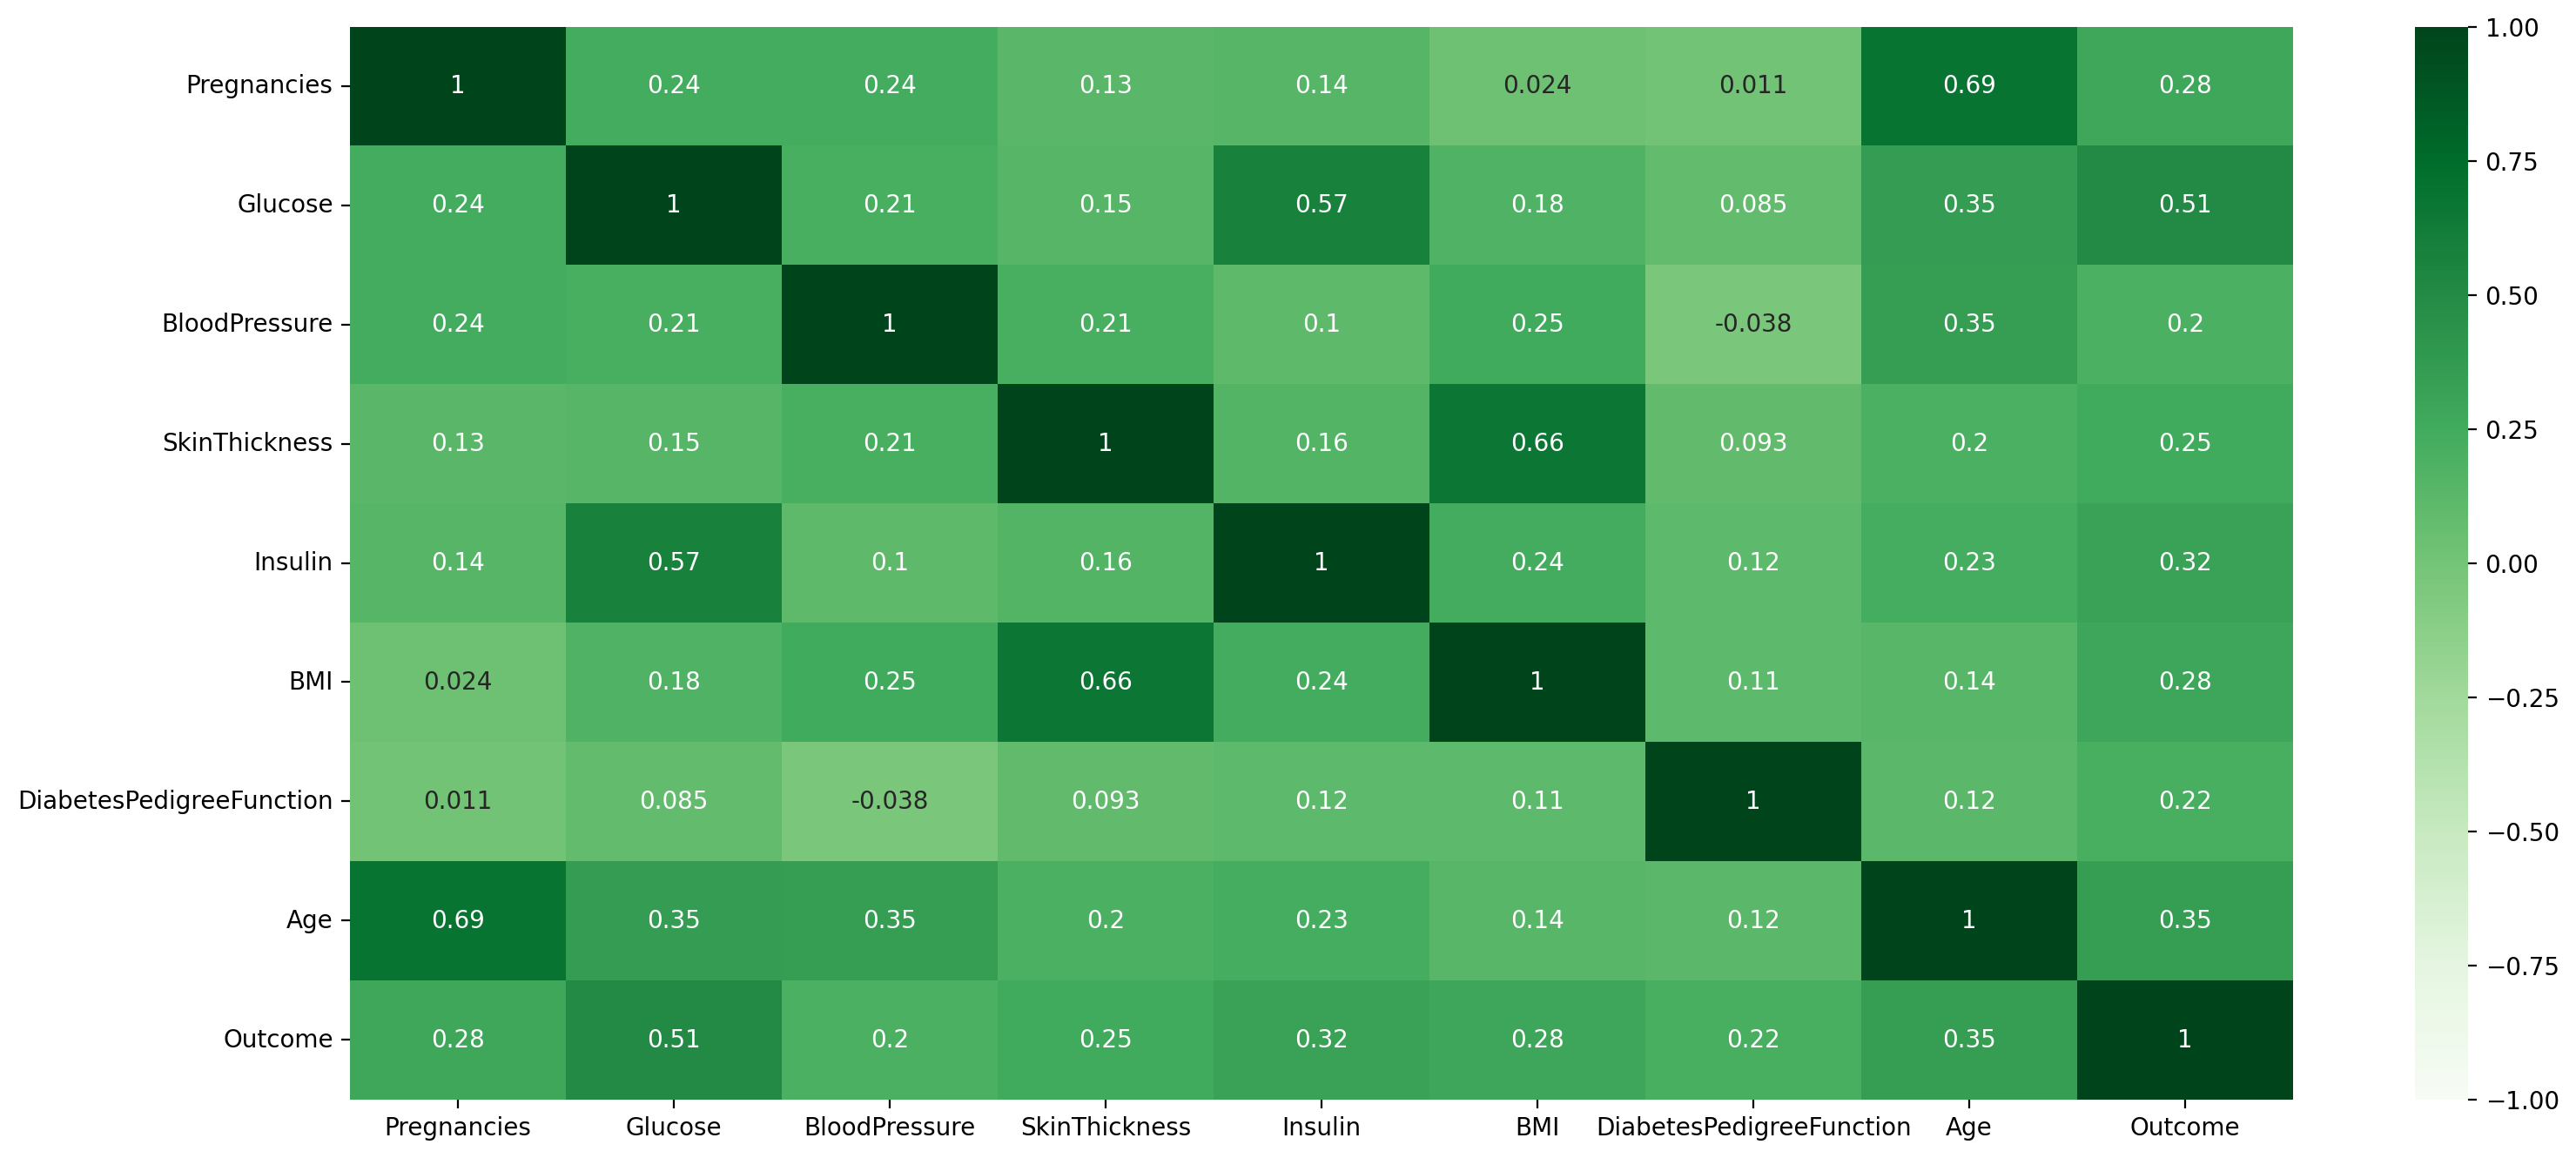

In [130]:
plt.figure(figsize= (18,8), dpi= 200)

sns.heatmap(corr, vmin=-1, vmax=1, cmap="Greens", annot= True)

plt.show()

# Week 3

# 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
# 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [131]:
X = df5.drop("Outcome",axis=1)
y = df5.Outcome

In [132]:
print(X.shape)
print(y.shape)

(373, 8)
(373,)


In [133]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
X_scaled = ssc.fit_transform(X)
X_scaled

array([[-0.71696835, -1.05929005, -0.35176092, ..., -0.69674531,
        -1.09440376, -0.96901857],
       [-1.02685154,  0.5625804 , -2.47062886, ...,  1.59669431,
         5.60376683,  0.23145946],
       [-0.09720197, -1.4309687 , -1.65567965, ..., -0.25334699,
        -0.83860375, -0.46881939],
       ...,
       [-0.40708516, -1.09307902, -1.00372028, ..., -0.65087652,
         0.7972531 , -0.86897873],
       [ 2.07198037, -0.65382244,  0.46318829, ...,  0.03715537,
        -1.08177166,  3.23265453],
       [ 0.52256441,  0.02195692,  0.13720861, ..., -0.98724766,
        -0.84807782, -0.06866005]])

In [305]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=10)

In [306]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(298, 8)
(298,)
(75, 8)
(75,)


# 1. Model Building with all Features with Scaled variables.

## 1.1. Logistic Regression :

In [136]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [137]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [138]:
logreg_pred = logreg.predict(X_test)
logreg_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [139]:
logreg.score(X_test,y_test)*100

80.0

In [140]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [280]:
cm = confusion_matrix(y_test,logreg_pred)
cm

array([[37, 11],
       [22,  5]], dtype=int64)

In [141]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        50
           1       0.81      0.52      0.63        25

    accuracy                           0.80        75
   macro avg       0.80      0.73      0.75        75
weighted avg       0.80      0.80      0.79        75



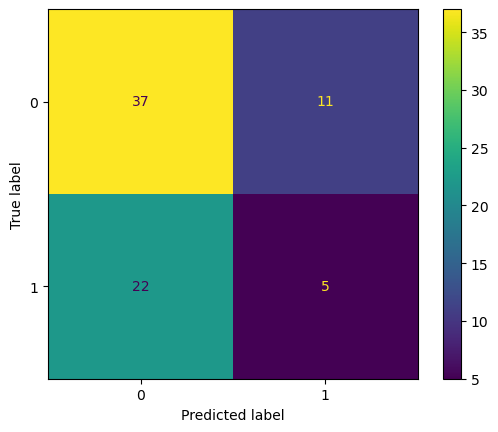

In [281]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

## 1.2. Support Vector Machines :

In [143]:
from sklearn.svm import SVC
svm = SVC()

In [144]:
svm.fit(X_train,y_train)

SVC()

In [145]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [146]:
svm.score(X_test,y_test)*100

78.66666666666666

In [147]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        50
           1       0.80      0.48      0.60        25

    accuracy                           0.79        75
   macro avg       0.79      0.71      0.73        75
weighted avg       0.79      0.79      0.77        75



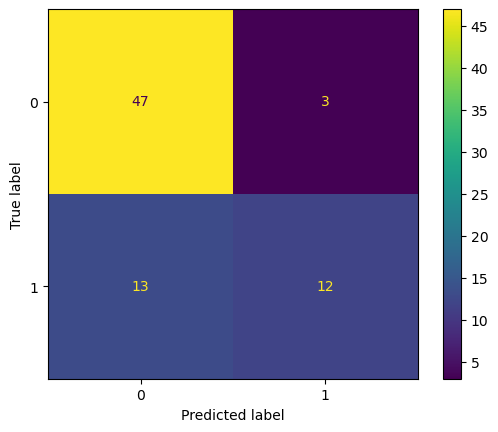

In [148]:
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

## 1.3. Decision Tree :

In [149]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [150]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [152]:
dtree.score(X_test,y_test)*100

76.0

## 1.4. KNN :

In [307]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [308]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [309]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [310]:
knn.score(X_test,y_test)*100

80.0

In [311]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        50
           1       0.71      0.68      0.69        25

    accuracy                           0.80        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.80      0.80      0.80        75



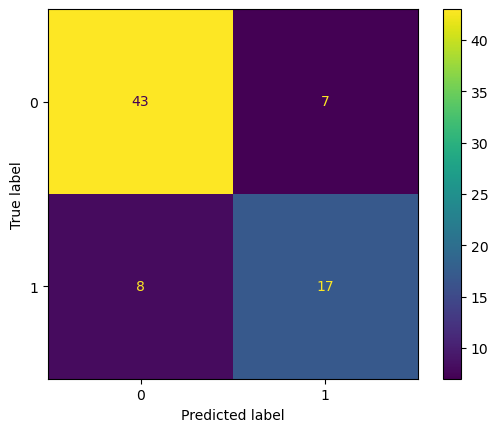

In [158]:
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

## 1.5. Random Forest :

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [160]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [161]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [162]:
rfc.score(X_test,y_test)*100

77.33333333333333

In [163]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.70      0.56      0.62        25

    accuracy                           0.77        75
   macro avg       0.75      0.72      0.73        75
weighted avg       0.77      0.77      0.77        75



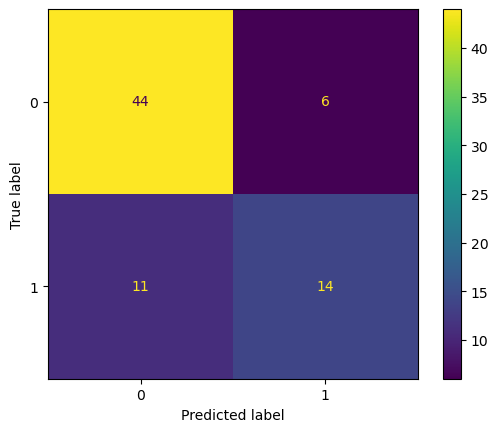

In [164]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

## 1.6. XGBoost :

In [165]:
from xgboost import XGBClassifier

In [166]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.predict(X_test)

[13:03:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [167]:
xgb.score(X_test,y_test)

0.7866666666666666

## Logistic Regression and KNN gave 80% accuracy. 
## Lets try to reduce number of features using p-values.

In [168]:
from statsmodels.api import OLS

In [169]:
X.shape

(373, 8)

In [170]:
y.shape

(373,)

In [171]:
ols_model = OLS(y, X)

In [172]:
results = ols_model.fit()

In [173]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.477
Model:                            OLS   Adj. R-squared (uncentered):              0.465
Method:                 Least Squares   F-statistic:                              41.57
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                    5.39e-47
Time:                        13:04:10   Log-Likelihood:                         -190.65
No. Observations:                 373   AIC:                                      397.3
Df Residuals:                     365   BIC:                                      428.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0249      0.009      2.741      0.006       0.007       0.043
Glucose                      0.0042      0.001      4.904      0.000       0.003       0.006
BloodPressure               -0.0063      0.002     -3.836      0.000      -0.010      -0.003
SkinThickness                0.0050      0.003      1.802      0.072      -0.000       0.010
Insulin                      0.0003      0.000      1.030      0.304      -0.000       0.001
BMI                         -0.0031      0.004     -0.760      0.448      -0.011       0.005
DiabetesPedigreeFunction     0.1486      0.068      2.201      0.028       0.016       0.281
Age                          0.0007      0.003      0.228      0.820      -0.005       0.007
==============================================================================
Omnibus:                       44.499   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.750
Skew:                           0.664   Prob(JB):                     1.73e-08
Kurtosis:                       2.268   Cond. No.                         684.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# Lot of Columns have P-Value > 0.05.

# These columns are not required to Predict Target.

# We can try Building the Model Without these Columns.

In [175]:
results.pvalues

Pregnancies                 0.006418
Glucose                     0.000001
BloodPressure               0.000147
SkinThickness               0.072327
Insulin                     0.303537
BMI                         0.447865
DiabetesPedigreeFunction    0.028383
Age                         0.819641
dtype: float64

In [176]:
results.pvalues[results.pvalues < 0.05]

Pregnancies                 0.006418
Glucose                     0.000001
BloodPressure               0.000147
DiabetesPedigreeFunction    0.028383
dtype: float64

In [177]:
(results.pvalues[results.pvalues < 0.05]).index

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

In [178]:
significant_cols = list((results.pvalues[results.pvalues < 0.05]).index)

In [179]:
significant_cols

['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']

In [180]:
len(significant_cols)

4

In [181]:
# we will Build our Model Using these 4 Features Only.

In [182]:
new_x = X[significant_cols].copy()

In [183]:
new_x.shape

(373, 4)

In [184]:
new_x.head()

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction
3,1,89.0,66.0,0.167
4,0,137.0,40.0,2.288
6,3,78.0,50.0,0.248
14,5,166.0,72.0,0.587
16,0,118.0,84.0,0.551


In [185]:
ssc_2= StandardScaler()

In [186]:
temp = ssc_2.fit_transform(new_x)
scaled_x = pd.DataFrame(temp, index=new_x.index, columns= new_x.columns)
scaled_x.head()

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction
3,-0.716968,-1.059290,-0.351761,-1.094404
4,-1.026852,0.562580,-2.470629,5.603767
6,-0.097202,-1.430969,-1.655680,-0.838604
14,0.522564,1.542460,0.137209,0.231967
16,-1.026852,-0.079410,1.115148,0.118278


### Dimensionality Reduction Using PCA:

In [187]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.99)

In [188]:
pca_result = pca.fit_transform(scaled_x)

In [189]:
pca_result

array([[-1.31037239, -1.10618741,  0.1086705 ,  0.07112444],
       [-1.25803579,  6.10299653, -0.21583508,  0.03639985],
       [-1.87713544, -0.6456764 , -1.142969  ,  0.50471512],
       ...,
       [-1.37588674,  0.81204497, -0.18625346,  0.64531794],
       [ 1.02088191, -1.42345192, -1.01070981,  1.41965142],
       [ 0.33414097, -0.86522378, -0.38401549,  0.06235059]])

In [190]:
pca_result.shape

(373, 4)

In [191]:
pca.explained_variance_ratio_

array([0.36538848, 0.25716264, 0.18939857, 0.18805032])

In [192]:
np.sum(pca.explained_variance_ratio_)

1.0

In [193]:
# Train Test Split:

In [194]:
pca_result.shape

(373, 4)

In [195]:
y.shape

(373,)

In [196]:
x_train, x_test, y_train, y_test = train_test_split(pca_result, y, test_size= 0.2, random_state= 42)

In [197]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(298, 4)
(75, 4)
(298,)
(75,)


# 2. Model Building using only Significant Columns (p-values<0.05) with PCA Data. 

## 2.1. Logistic Regression Model :

In [198]:
logreg_2 = LogisticRegression()
logreg_2.fit(x_train,y_train)

LogisticRegression()

In [199]:
logreg_2.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [200]:
logreg_2.score(x_test,y_test)

0.72

## 2.2. Support Vector Machines :

In [201]:
svm_2 = SVC()
svm_2.fit(x_train,y_train)

SVC()

In [202]:
svm_2.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [203]:
svm_2.score(x_test,y_test)

0.7333333333333333

## 2.3. DecisionTree :

In [204]:
dtree_2 = DecisionTreeClassifier()
dtree_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [205]:
dtree_2.predict(x_test)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [206]:
dtree_2.score(x_test,y_test)

0.7733333333333333

## 2.4. KNN :

In [274]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(x_train,y_train)

KNeighborsClassifier()

In [275]:
knn_2.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [276]:
knn_2.score(x_test,y_test)

0.72

## 2.5. Random Forest :

In [207]:
rfc_2 = RandomForestClassifier(n_estimators=100)
rfc_2.fit(x_train,y_train)

RandomForestClassifier()

In [208]:
rfc_2.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [209]:
rfc_2.score(x_test,y_test)

0.7333333333333333

## 2.6. XG Boost :

In [210]:
xgb_2 = XGBClassifier()
xgb_2.fit(x_train,y_train)

[13:04:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
xgb_2.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [212]:
xgb_2.score(x_test,y_test)

0.7866666666666666

# Lets Try with scaled variables with only significant variables (p-values<0.05) without PCA.

In [213]:
scaled_x.shape

(373, 4)

In [214]:
scaled_x.head()

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction
3,-0.716968,-1.059290,-0.351761,-1.094404
4,-1.026852,0.562580,-2.470629,5.603767
6,-0.097202,-1.430969,-1.655680,-0.838604
14,0.522564,1.542460,0.137209,0.231967
16,-1.026852,-0.079410,1.115148,0.118278


In [215]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size= 0.2, random_state= 42)

In [216]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(298, 4)
(298,)
(75, 4)
(75,)


## 3.1. Logistic Regression :

In [217]:
logreg_3 = LogisticRegression()

In [218]:
logreg_3.fit(x_train,y_train)
logreg_3.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [219]:
logreg_3.score(x_test,y_test)

0.72

## 3.2. Support Vector Machines :

In [220]:
svm_3 = SVC()
svm_3.fit(x_train,y_train)
svm_3.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [221]:
svm_3.score(x_test,y_test)

0.7333333333333333

## 3.3. Decision tree :

In [239]:
dtree_3 = DecisionTreeClassifier()
dtree_3.fit(x_train,y_train)
dtree_3.predict(x_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [240]:
dtree_3.score(x_test,y_test)

0.6133333333333333

## 3.4. KNN :

In [277]:
knn_3 = KNeighborsClassifier(n_neighbors=5)

In [278]:
knn_3.fit(x_train,y_train)
knn_3.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [279]:
knn_3.score(x_test,y_test)

0.72

## 3.5. Random Forest :

In [257]:
rfc_3 = RandomForestClassifier(n_estimators=100)
rfc_3.fit(x_train,y_train)
rfc_3.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [258]:
rfc_3.score(x_test,y_test)

0.68

## 3.6. XG Boost :

In [272]:
xgb_3 = XGBClassifier()
xgb_3.fit(x_train,y_train)
xgb_3.predict(x_test)

[13:08:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [273]:
xgb_3.score(x_test,y_test)

0.7466666666666667

# Lets compare the result of all models with different scenarios :

## 1. Model Building with all Features with Scaled variables

#### 1.1. Logistic Regression : 80.00%
#### 1.2. Support Vector Machines : 78.66%
#### 1.3. Decision Tree : 76.00%
#### 1.4. KNN : 80.00%
#### 1.5. Random Forest Classifier : 77.33%
#### 1.6. XGBoost : 78.66%

## 2. Model Building using only Significant Columns (p-values<0.05) with PCA Data

#### 2.1. Logistic Regression : 72.00%
#### 2.2. Support Vector Machines : 73.33%
#### 2.3. Decision Tree : 77.33%
#### 2.4. KNN : 72.00%
#### 2.5. Random Forest Classifier : 74.66%
#### 2.6. XG Boost : 74.66%

## 3. Model with only significant variables (p-values<0.05) without PCA

#### 3.1. Logistic Regression : 72.00%
#### 3.2. Support Vector Machines : 73.33%
#### 3.3. Decision Tree : 61.33% 
#### 3.4. KNN : 72.00%
#### 3.5. Random Forest Classifier : 68.00%
#### 3.6. XG Boost : 74.66%

Here we can clearly see that Logistic Regression with all Features with Scaled variables gave 80% accuracy. Also KNN gave us same 80% accuracy.

We will Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve) for only these two models.

# Week 4
# 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

## ROC curve for Logistic Regression Model with all Features with Scaled variables

In [292]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        48
           1       0.31      0.19      0.23        27

    accuracy                           0.56        75
   macro avg       0.47      0.48      0.46        75
weighted avg       0.51      0.56      0.53        75



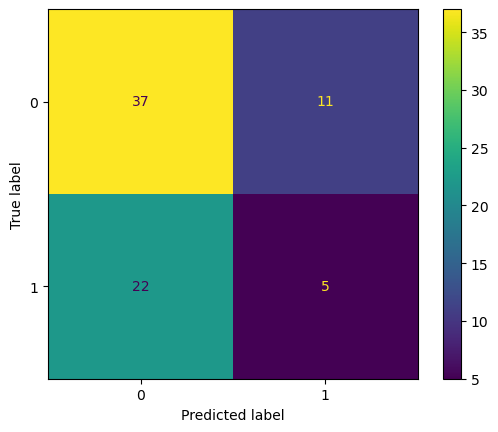

In [293]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

AUC: 0.863


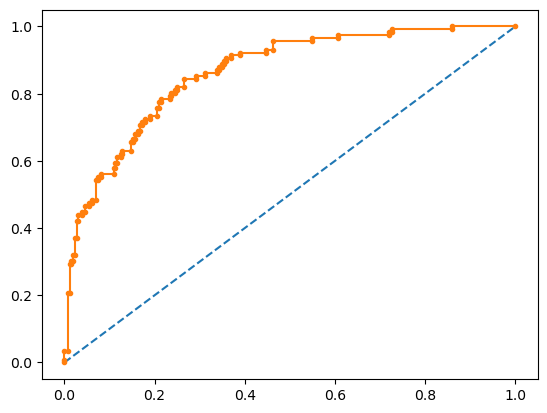

In [290]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = logreg.predict_proba(X_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

## ROC curve for KNN Model with all Features with Scaled variables

In [312]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        50
           1       0.71      0.68      0.69        25

    accuracy                           0.80        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.80      0.80      0.80        75



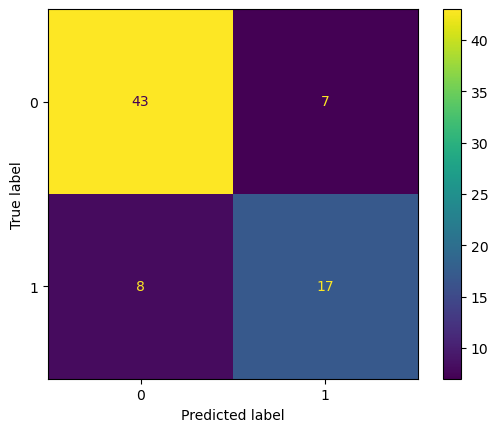

In [313]:
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

AUC: 0.891
True Positive Rate - [0.         0.09482759 0.36206897 0.70689655 0.8362069  0.97413793
 1.        ], False Positive Rate - [0.         0.         0.02723735 0.09727626 0.20622568 0.45525292
 1.        ] Thresholds - [2.  1.  0.8 0.6 0.4 0.2 0. ]


Text(0, 0.5, 'True Positive Rate')

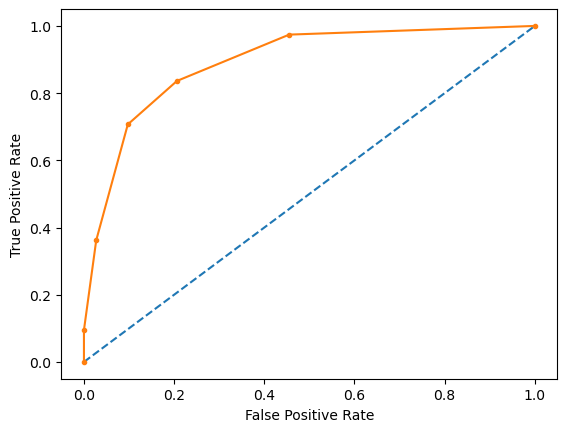

In [291]:
# predict probabilities
probs = knn.predict_proba(X_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## 2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.